# Machine Learning with Matrix Data for Recommender Systems

### 1. Recommender systems are a hot topic. Recommendation systems can be formulated as a task of matrix completion in machine learning. Recommender systems aim to predict the rating that a user will give for an item (e.g., a restaurant, a movie, a product). 

### 2. Download the movie rating dataset from: https://www.kaggle.com/rounakbanik/themovies-dataset. These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website. 

### 3. Building a small recommender system with the matrix data: “ratings.csv”. You can use the recommender system library: Surprise (http://surpriselib.com), use other recommender system libraries, or implement from scratches. 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import accuracy
%matplotlib inline

### a. Read data from “ratings.csv” with line format: 'userID movieID rating timestamp'. 

In [55]:
ratings_small =pd.read_csv('ratings_small.csv')
reader = Reader(line_format='user item rating', rating_scale=(1,5))
data = Dataset.load_from_df(ratings_small[['userId','movieId','rating']], reader)

### b. MAE and RMSE are two famous metrics for evaluating the performances of a recommender system. The definition of MAE can be found via: https://en.wikipedia.org/wiki/Mean_absolute_error. The definition of RMSE can be found via: https://en.wikipedia.org/wiki/Root-mean-square_deviation. 

## c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation 

>### Probabilistic Matrix Factorization (PMF)


In [59]:
# Using the PMF method
pmf = SVD(biased=False)

# Run 5-fold cross-validation and print results.
pmf_cv = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0190  0.9982  1.0069  1.0066  1.0006  1.0063  0.0072  
MAE (testset)     0.7856  0.7720  0.7798  0.7792  0.7726  0.7778  0.0050  
Fit time          6.27    6.74    7.92    7.24    6.10    6.85    0.66    
Test time         0.14    0.17    0.12    0.28    0.13    0.17    0.06    


##### Mean of MAE for the five fold cross validation by PMF

In [94]:
pmf_cv['test_mae'].mean()

0.7778359031169122

##### Mean of RMSE for the five fold cross validation by PMF

In [95]:
pmf_cv['test_rmse'].mean()

1.0062576988614322

>### User based Collaborative Filtering

In [57]:
sim_options = {
    "user_based": True,  
}
ubcf = KNNWithMeans(sim_options=sim_options)
ubcf_cv = cross_validate(ubcf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9282  0.9127  0.9160  0.9176  0.9183  0.9185  0.0052  
MAE (testset)     0.7093  0.6979  0.7008  0.7048  0.7036  0.7033  0.0038  
Fit time          0.32    0.38    0.30    0.33    0.38    0.34    0.03    
Test time         3.07    2.30    2.53    2.40    2.81    2.62    0.28    


##### Mean of MAE for the five fold cross validation by User Based Collaborative Filtering

In [97]:
ubcf_cv['test_mae'].mean()

0.7032787250949093

##### Mean of RMSE for the five fold cross validation by User Based Collaborative Filtering

In [98]:
ubcf_cv['test_rmse'].mean()

0.9185477755198704

>### Item based Collaborative Filtering

In [58]:
sim_options = {
    "name"
    "user_based": False,  
}
ibcf = KNNWithMeans(sim_options=sim_options)
ibcf_cv = cross_validate(ubcf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9198  0.9233  0.9165  0.9192  0.9180  0.9193  0.0023  
MAE (testset)     0.7049  0.7041  0.7007  0.7046  0.7053  0.7039  0.0017  
Fit time          0.22    0.26    0.27    0.33    0.27    0.27    0.03    
Test time         2.04    1.70    2.05    1.89    1.79    1.89    0.14    


##### Mean of MAE for the five fold cross validation by Item Based Collaborative Filtering

In [99]:
ibcf_cv['test_mae'].mean()

0.7039296420632072

##### Mean of RMSE for the five fold cross validation by Item Based Collaborative Filtering

In [100]:
ibcf_cv['test_rmse'].mean()

0.919345948628431

## d. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data? 

In [78]:
pmf_df = pd.DataFrame(pmf_cv)
pmf_df = pmf_df[['test_rmse','test_mae']].rename(columns={'test_rmse':'pmf_rmse','test_mae':'pmf_mae'})

In [80]:
ubcf_df = pd.DataFrame(ubcf_cv)
ubcf_df = ubcf_df[['test_rmse','test_mae']].rename(columns={'test_rmse':'ubcf_rmse','test_mae':'ubcf_mae'})

In [81]:
ibcf_df = pd.DataFrame(ibcf_cv)
ibcf_df = ibcf_df[['test_rmse','test_mae']].rename(columns={'test_rmse':'ibcf_rmse','test_mae':'ibcf_mae'})

In [84]:
metrics = pd.concat([pmf_df,ubcf_df,ibcf_df], axis=1)

In [104]:
# MAE comparison fot the three methods
metrics.loc[:,metrics.columns.str.contains('mae')].mean()

pmf_mae     0.777836
ubcf_mae    0.703279
ibcf_mae    0.703930
dtype: float64

##### The User based collaborative filtering method has the lowest MAE among all

In [103]:
# RMSE comparison fot the three methods
metrics.loc[:,metrics.columns.str.contains('rmse')].mean()

pmf_rmse     1.006258
ubcf_rmse    0.918548
ibcf_rmse    0.919346
dtype: float64

##### The User based collaborative filtering has the lowest RMSE among all

##### The User Based Collaborative Filtering with lowest error is relatively the best

## e. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?

In [198]:
#### User Based Collaborative Fileting 

In [122]:
dist_measures = ['cosine', 'msd', 'pearson']

In [134]:
ubcf_MAE_list = []
ubcf_RMSE_list = []
for i in dist_measures:
    sim_options = {"name":i,"user_based": True}
    print(sim_options)
    e_ubcf = KNNWithMeans(sim_options=sim_options)
    e_ubcf_cv = cross_validate(e_ubcf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);
    ubcf_MAE_list.append(e_ubcf_cv['test_mae'].mean())
    ubcf_RMSE_list.append(e_ubcf_cv['test_rmse'].mean())

{'name': 'cosine', 'user_based': True}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9293  0.9206  0.9187  0.9200  0.9192  0.9216  0.0039  
MAE (testset)     0.7122  0.7048  0.7041  0.7058  0.7052  0.7064  0.0029  
Fit time          0.66    0.80    0.96    0.90    0.97    0.86    0.12    
Test time         2.37    1.89    2.06    2.88    2.34    2.31    0.34    
{'name': 'msd', 'user_based': True}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matri

In [135]:
ubcf_MAE_list

[0.7064224938583539, 0.7038300708757503, 0.7042134890537148]

In [136]:
ubcf_RMSE_list

[0.9215810850795323, 0.9196008177029263, 0.9235144268169752]

In [137]:
e_ubcf_df = pd.DataFrame([ubcf_MAE_list,ubcf_RMSE_list], columns=dist_measures, index=['MAE','RMSE'])

In [138]:
e_ubcf_df

,cosine,msd,pearson
MAE,0.706422,0.703830,0.704213
RMSE,0.921581,0.919601,0.923514


Text(0.5, 0.98, 'User Based Collaborative Filtering')

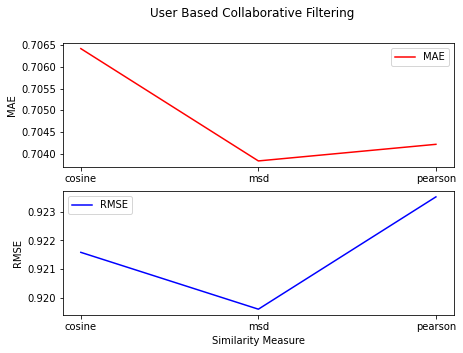

In [196]:
fig, ax = plt.subplots(2,1, figsize=(7,5))
ax[0].plot(e_ubcf_df.loc['MAE',:], label='MAE', c='red')
ax[1].plot(e_ubcf_df.loc['RMSE',:], label='RMSE', c='blue')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel("MAE")
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("Similarity Measure")
fig.suptitle("User Based Collaborative Filtering")

##### For the User Based Collaboration Filtering, the MSD was showing the lowest error among other similarity methods (cosine & pearson) in both MAE and the RMSE. Pearson shows the highest RMSE and Cosine showing the highest MAE

In [128]:
# Item based Collaborative Filtering

In [129]:
ibcf_MAE_list = []
ibcf_RMSE_list = []
for i in dist_measures:
    sim_options = {"name":i,"user_based": False}
    print(sim_options)
    e_ibcf = KNNWithMeans(sim_options=sim_options)
    e_ibcf_cv = cross_validate(e_ibcf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);
    ibcf_MAE_list.append(e_ibcf_cv['test_mae'].mean())
    ibcf_RMSE_list.append(e_ibcf_cv['test_rmse'].mean())

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9224  0.9275  0.9256  0.9245  0.9285  0.9257  0.0022  
MAE (testset)     0.7043  0.7113  0.7114  0.7075  0.7117  0.7092  0.0029  
Fit time          16.34   16.58   16.29   15.73   17.52   16.49   0.58    
Test time         6.76    7.49    7.40    6.78    7.44    7.17    0.33    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

In [130]:
ibcf_MAE_list

[0.7092357898394571, 0.7006553697648977, 0.7063407503765099]

In [131]:
ibcf_RMSE_list

[0.9257033799933975, 0.9153101222349573, 0.926234738613822]

In [132]:
e_ibcf_df = pd.DataFrame([ibcf_MAE_list,ibcf_RMSE_list], columns=dist_measures, index=['MAE','RMSE'])

In [133]:
e_ibcf_df

,cosine,msd,pearson
MAE,0.709236,0.700655,0.706341
RMSE,0.925703,0.915310,0.926235


Text(0.5, 0.98, 'Item Based Collaborative Filtering')

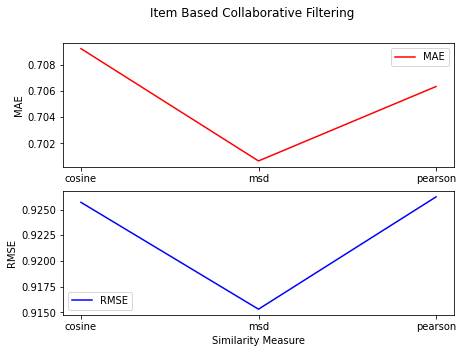

In [197]:
fig, ax = plt.subplots(2,1, figsize=(7,5))
ax[0].plot(e_ibcf_df.loc['MAE',:], label='MAE', c='red')
ax[1].plot(e_ibcf_df.loc['RMSE',:], label='RMSE', c='blue')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel("MAE")
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("Similarity Measure")
fig.suptitle("Item Based Collaborative Filtering")

##### For the Item Based Collaboration Filtering, the MSD was showing the lowest error among other similarity methods (cosine & pearson) in both MAE and the RMSE. Pearson shows the highest RMSE and Cosine showing the highest MAE. These measures in Item Based Collaboratiove Filtering is consistent with the User Based Collaboration Filtering.

## f. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results. 

In [168]:
k=range(5,55,5)
list(k)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [170]:
#Examining K for User Based Collaborative Filtering

In [172]:
ubcf_RMSE_list_k = []
for i in k:
    sim_options = {"name":"msd","user_based": True}
    print("K is : {}".format(i))
    f_ubcf = KNNWithMeans(sim_options=sim_options, k=i)
    f_ubcf_cv = cross_validate(f_ubcf, data, measures=['RMSE'], cv=5, verbose=True);
    ubcf_RMSE_list_k.append(f_ubcf_cv['test_rmse'].mean())
    print(ubcf_RMSE_list_k)

K is : 5
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9526  0.9568  0.9608  0.9568  0.9634  0.9581  0.0037  
Fit time          0.20    0.26    0.29    0.25    0.33    0.27    0.04    
Test time         1.13    1.03    1.13    1.09    1.09    1.10    0.04    
[0.9580620938491506]
K is : 10
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd 

In [173]:
#Examining K for User Based Collaborative Filtering

In [174]:
ibcf_RMSE_list_k = []
for i in k:
    sim_options = {"name":"msd","user_based": True}
    print("K is : {}".format(i))
    f_ibcf = KNNWithMeans(sim_options=sim_options, k=i)
    f_ibcf_cv = cross_validate(f_ibcf, data, measures=['RMSE'], cv=5, verbose=True);
    ibcf_RMSE_list_k.append(f_ibcf_cv['test_rmse'].mean())
    print(ibcf_RMSE_list_k)

K is : 5
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9517  0.9628  0.9583  0.9602  0.9589  0.9584  0.0037  
Fit time          0.25    0.29    0.26    0.29    0.25    0.27    0.02    
Test time         1.11    1.15    1.22    1.08    1.39    1.19    0.11    
[0.9583900611855014]
K is : 10
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd 

In [177]:
k_comp_df = pd.DataFrame([ubcf_RMSE_list_k,ibcf_RMSE_list_k], columns=list(k), index=['UBCF','IBCF']).transpose()

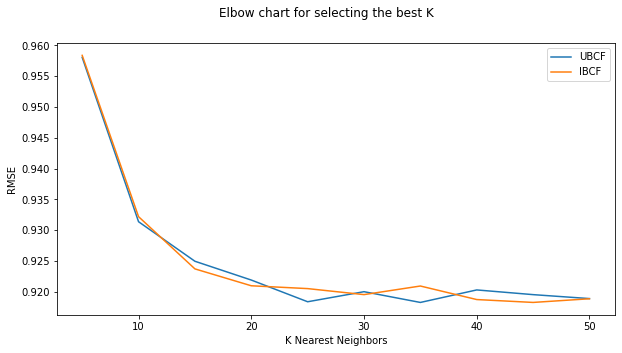

In [204]:
plt.figure(figsize=(10,5));
plt.suptitle("Elbow chart for selecting the best K")
plt.xlabel("K Nearest Neighbors")
plt.ylabel("RMSE")
plt.plot(k_comp_df.UBCF, label='UBCF')
plt.plot(k_comp_df.IBCF, label='IBCF')
plt.legend()